In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 0. Dataloading, Featureselection, Scaling

In [2]:
df = pd.read_csv("/Users/luisi/Downloads/Data/features_3_sec.csv") 
df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues


In [40]:
# Step 1: Features
X_features = df.drop(["label", "filename", "length"], axis = 1)
X_features.head(1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,Cluster_K(5),Cluster_PCA_K(5),Cluster_PCA_K(6),Cluster_PCA_K(10),Cluster_FD_K(5)
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,38.099152,-5.050335,33.618073,-0.243027,43.771767,1,3,2,6,1


In [42]:
# Step 2: Feature Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_features), columns = X_features.columns)
X_scaled.head(3)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,Cluster_K(5),Cluster_PCA_K(5),Cluster_PCA_K(6),Cluster_PCA_K(10),Cluster_FD_K(5)
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.055344,0.380831,0.026797,0.506746,0.047781,0.25,0.75,0.4,0.666667,0.25
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.076365,0.418452,0.082414,0.593029,0.065548,0.75,1.00,0.0,0.666667,0.25
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.067509,0.433742,0.043841,0.546264,0.036062,0.25,0.75,0.4,0.666667,0.25


# 1. K-Means 

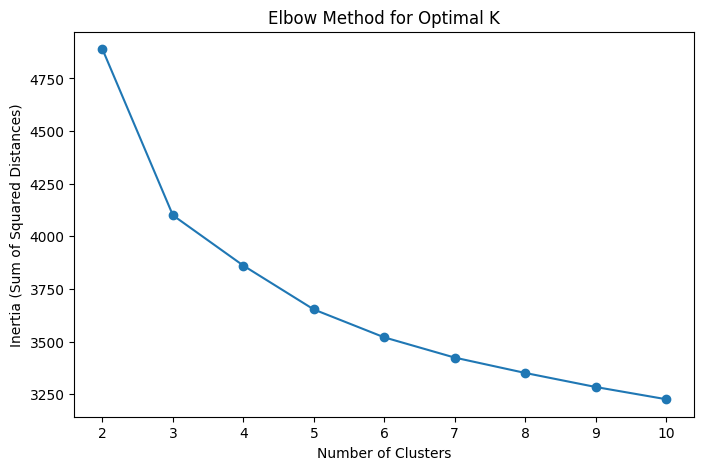

In [5]:
# Step 1: Finding the Optimal Number of Clusters 
clusters = range(2, 11)
inertia = []

for k in clusters:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
   

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [6]:
# Step 2: Applying K-Means with Optimal K 

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_K(5)"] = kmeans.fit_predict(X_scaled)

df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,Cluster_K(5)
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,1


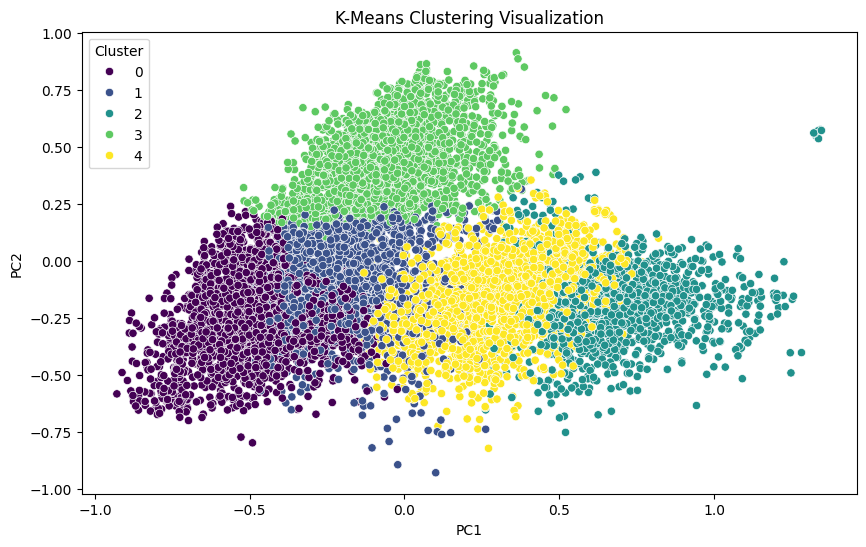

In [7]:
# Step 3: Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster_K(5)"] = df["Cluster_K(5)"]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["Cluster_K(5)"], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

### Evaluting the model

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# 1. Silhouette Score -> Measures how well-separated clusters are. Values range from -1 to 1 (higher is better).
silhouette_avg = silhouette_score(X_scaled, df["Cluster_K(5)"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity -> Within Clusters Checks if music samples in the same cluster are perceptually similar (high correlation is good)
cluster_similarities = {}
for cluster in df["Cluster_K(5)"].unique():
    cluster_points = X_scaled[df["Cluster_K(5)"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.16210912158215077

Average Cosine Similarity Per Cluster:
Cluster 1: 0.9447115993915971
Cluster 3: 0.9662080562445532
Cluster 0: 0.9364102278698215
Cluster 4: 0.9613218339112904
Cluster 2: 0.95096505162361


# 2. PCA + KMeans

In [9]:
# Step 1: Applying PCA
pca = PCA(n_components=24) 
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

np.float64(0.9079912249739543)

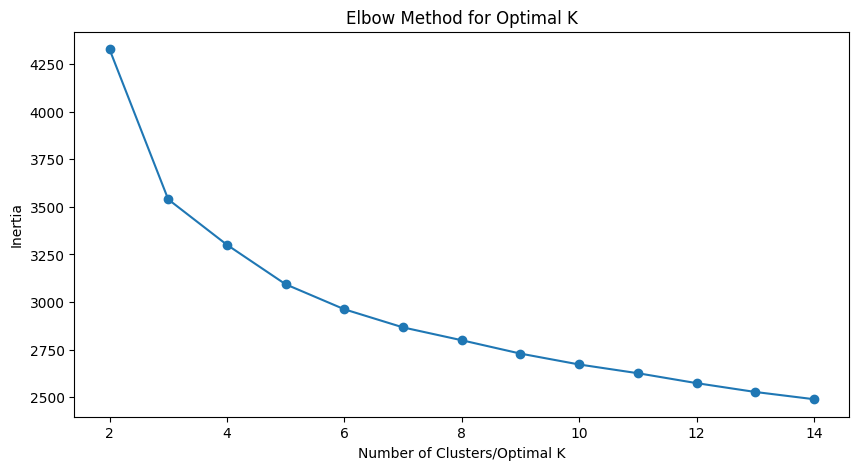

In [10]:
# Step 2: Finding Optimal K for K-Means
inertia_p = []
clusters = range(2, 15)

for k in clusters:
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    km.fit(X_pca)
    inertia_p.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(clusters, inertia_p, marker = "o")
plt.xlabel("Number of Clusters/Optimal K")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

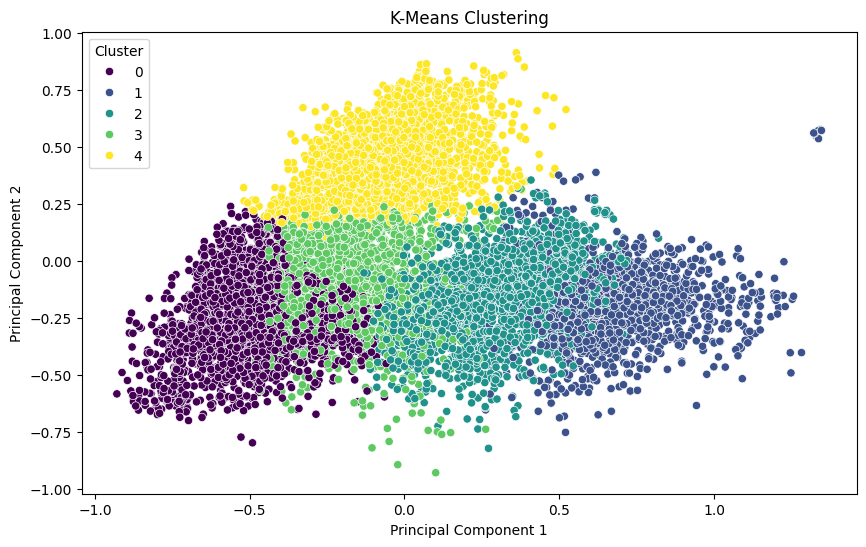

In [11]:
# Step 3a: Applying K-Means with optimal K - Option 1
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_PCA_K(5)"] = kmeans.fit_predict(X_pca)

df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y = df_pca.iloc[:, 1], hue = df["Cluster_PCA_K(5)"], palette = "viridis")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

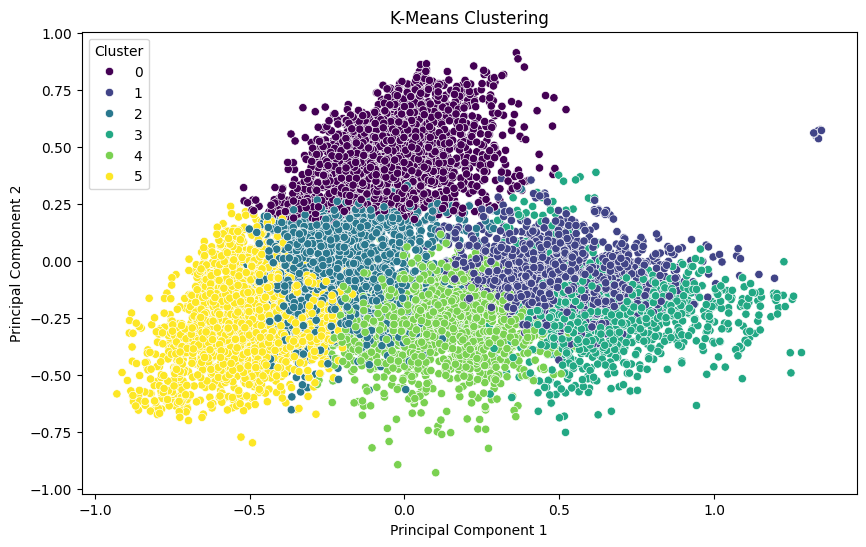

In [12]:
# Step 3b: Applying K-Means with optimal K - Option 2
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_PCA_K(6)"] = kmeans.fit_predict(X_pca)

df_pca1 = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y = df_pca.iloc[:, 1], hue = df["Cluster_PCA_K(6)"], palette = "viridis")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [43]:
### just for comparison purposes with the labels ###
# Step 3b: Applying K-Means with optimal K - Option 3
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_PCA_K(10)"] = kmeans.fit_predict(X_pca)
df_pca2 = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

### Evaluating the models

In [44]:
### MODEL OPTION 1 ###
# 1. Silhouette Score 
silhouette_avg = silhouette_score(df_pca, df["Cluster_PCA_K(5)"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity 
cluster_similarities = {}
for cluster in df["Cluster_PCA_K(5)"].unique():
    cluster_points = df_pca[df["Cluster_PCA_K(5)"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.17856057102471423

Average Cosine Similarity Per Cluster:
Cluster 3: 0.26091441704623536
Cluster 4: 0.47498078363965524
Cluster 0: 0.5028772420605532
Cluster 2: 0.3658147362436745
Cluster 1: 0.6037152057236943


In [45]:
### MODEL OPTION 2 ###
# 1. Silhouette Score 
silhouette_avg = silhouette_score(df_pca1, df["Cluster_PCA_K(6)"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity 
cluster_similarities = {}
for cluster in df["Cluster_PCA_K(6)"].unique():
    cluster_points = df_pca1[df["Cluster_PCA_K(6)"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.15978952824056925

Average Cosine Similarity Per Cluster:
Cluster 2: 0.26700113695645117
Cluster 0: 0.49972335278299757
Cluster 5: 0.5303623238895926
Cluster 4: 0.29254171841112875
Cluster 1: 0.6087478533418536
Cluster 3: 0.6127031835487973


# 3. Correlation Analysis + Feature Dropping

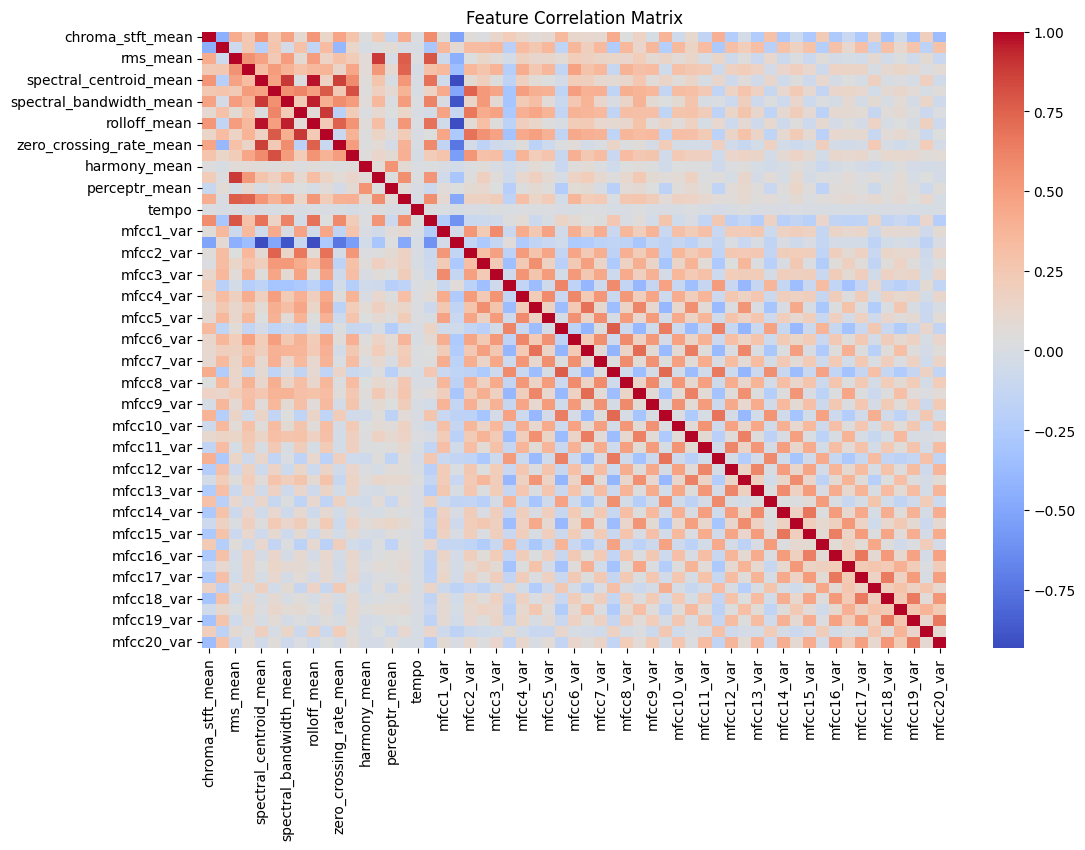

In [16]:
# Step 1: Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [17]:
# Correlation Matrix 
corr_matrix = X_scaled.corr().abs()
corr_matrix

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
chroma_stft_mean,1.000000,0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,...,0.228293,0.264815,0.103968,0.273841,0.168254,0.308342,0.062985,0.313233,0.193666,0.363354
chroma_stft_var,0.443757,1.000000,0.078410,0.251900,0.208136,0.276964,0.031197,0.291007,0.141792,0.330930,...,0.221620,0.296099,0.111544,0.303262,0.171744,0.295359,0.107008,0.277295,0.173398,0.287195
rms_mean,0.424706,0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,...,0.055563,0.032953,0.013952,0.041470,0.087615,0.046180,0.024552,0.062662,0.082251,0.103519
rms_var,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,...,0.064570,0.159390,0.144238,0.144163,0.004785,0.102019,0.136798,0.095054,0.015085,0.073571
spectral_centroid_mean,0.534670,0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,...,0.116866,0.025006,0.026879,0.018358,0.177934,0.006376,0.018651,0.011018,0.191512,0.051205
spectral_centroid_var,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,...,0.134131,0.125906,0.134869,0.115752,0.045517,0.093684,0.123857,0.074366,0.012324,0.052981
spectral_bandwidth_mean,0.464617,0.031197,0.495142,0.383329,0.890382,0.556491,1.000000,0.223836,0.951000,0.406680,...,0.012459,0.023060,0.089523,0.021857,0.084331,0.005564,0.074453,0.020422,0.133895,0.063954
spectral_bandwidth_var,0.100909,0.291007,0.085760,0.285950,0.021120,0.614254,0.223836,1.000000,0.070097,0.891339,...,0.180031,0.101519,0.093049,0.078486,0.122140,0.051146,0.094140,0.022953,0.091730,0.015888
rolloff_mean,0.526881,0.141792,0.500178,0.350716,0.974360,0.492965,0.951000,0.070097,1.000000,0.237905,...,0.098611,0.032600,0.035871,0.026397,0.158802,0.012166,0.033071,0.020990,0.182626,0.065557
rolloff_var,0.138394,0.330930,0.157281,0.377474,0.172380,0.780308,0.406680,0.891339,0.237905,1.000000,...,0.188433,0.112760,0.099636,0.095440,0.110838,0.069654,0.094853,0.044384,0.090789,0.031120


In [18]:
# Finding the highest correlations 
corr_read = corr_matrix.unstack().reset_index()
corr_read.columns = ["Feature 1", "Feature 2", "Correlation"]
corr_read = corr_read[corr_read["Feature 1"] != corr_read["Feature 2"]]
corr_sorted = corr_read.sort_values(by = "Correlation", ascending=False)
corr_sorted.head(20)

,Feature 1,Feature 2,Correlation
460,rolloff_mean,spectral_centroid_mean,0.974360
236,spectral_centroid_mean,rolloff_mean,0.974360
350,spectral_bandwidth_mean,rolloff_mean,0.951000
462,rolloff_mean,spectral_bandwidth_mean,0.951000
247,spectral_centroid_mean,mfcc2_mean,0.931435
1087,mfcc2_mean,spectral_centroid_mean,0.931435
1091,mfcc2_mean,rolloff_mean,0.923652
475,rolloff_mean,mfcc2_mean,0.923652
520,rolloff_var,spectral_bandwidth_var,0.891339
408,spectral_bandwidth_var,rolloff_var,0.891339


In [19]:
# Step 2a: Feature Dropping 
# Dropping features with high correlations (1 feature)
df_reduced1 = X_scaled.drop(["rolloff_mean"], axis = 1)

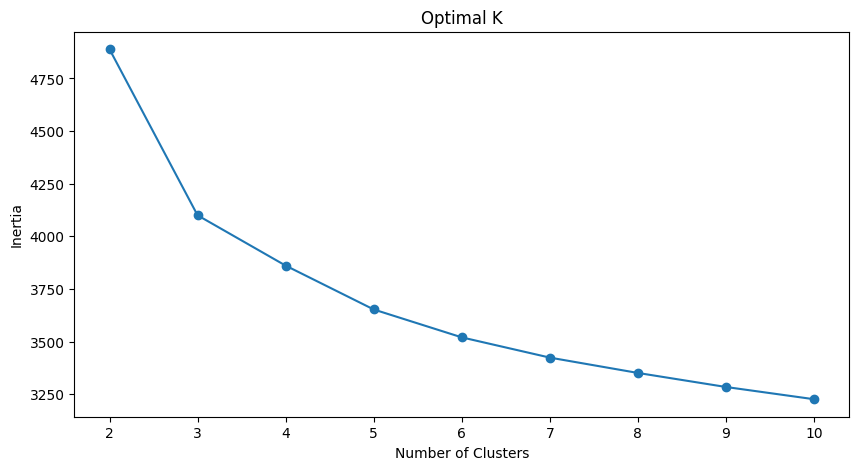

In [20]:
# Step 3a: Finding Optimal K 
inertia_1 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced1)
    inertia_1.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Optimal K")
plt.show()

In [21]:
# Step 2b: Feature Dropping (2 features)
df_reduced2 = X_scaled.drop(["rolloff_mean","spectral_bandwidth_mean"], axis = 1)

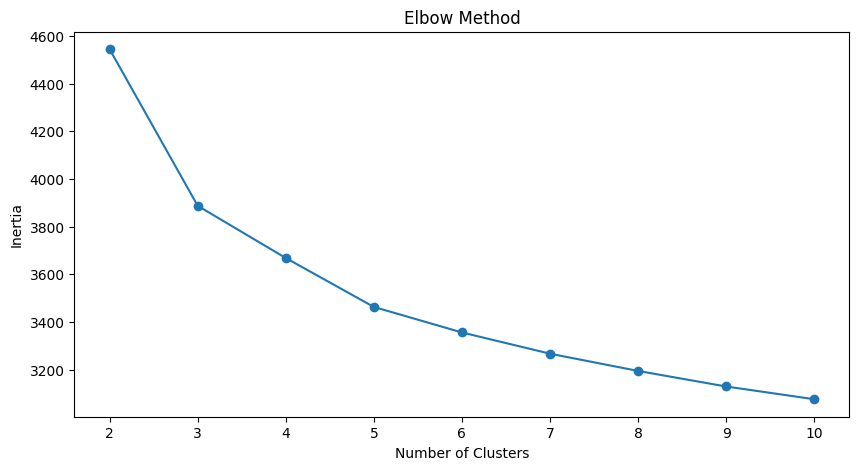

In [22]:
# Step 3b: Finding Optimal k
inertia_2 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced2)
    inertia_2.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia_2, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [23]:
# Step 2c: Feature Dropping (3 features)
df_reduced3 = X_scaled.drop(["rolloff_mean","spectral_bandwidth_mean", "mfcc2_mean"], axis = 1)

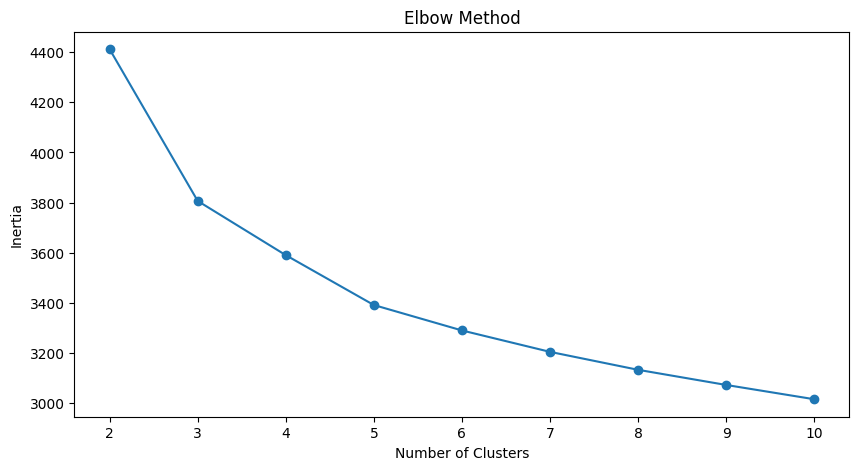

In [24]:
inertia_3 = []
cluster = range(2, 11)

for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_reduced3)
    inertia_3.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(cluster, inertia_3, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [25]:
# Step 4: Applying K-Means with optimal K 
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_FD_K(5)"] = kmeans.fit_predict(df_reduced3)
df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,Cluster_K(5),Cluster_PCA_K(5),Cluster_PCA_K(6),Cluster_PCA_K(10),Cluster_FD_K(5)
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-5.050335,33.618073,-0.243027,43.771767,blues,1,3,2,6,1


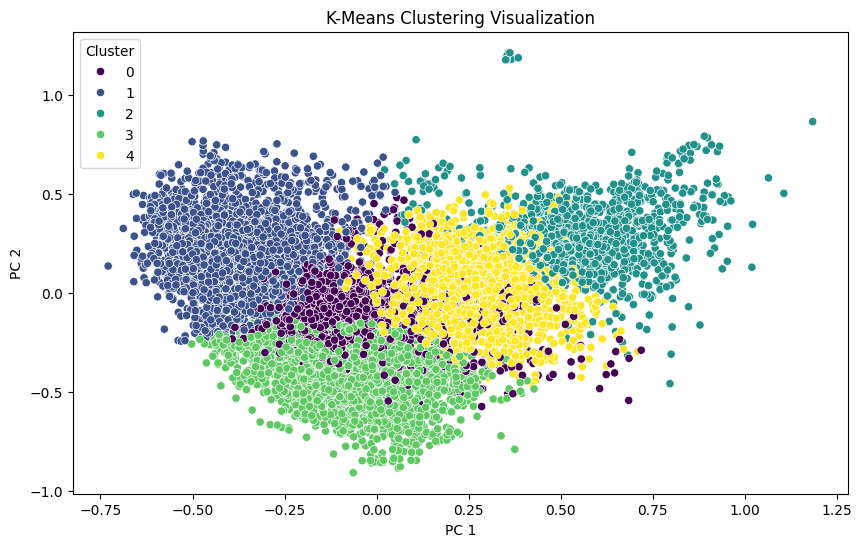

In [26]:
# Step 5: Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca_fd = pca.fit_transform(df_reduced3)

df_pca_fd = pd.DataFrame(df_pca_fd, columns=["PC1", "PC2"])
df_pca_fd["Cluster_FD_K(5)"] = df["Cluster_FD_K(5)"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_fd["PC1"], y=df_pca_fd["PC2"], hue=df["Cluster_FD_K(5)"], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()

### Evaluating the model

In [27]:
# 1. Silhouette Score
silhouette_avg = silhouette_score(df_reduced3, df["Cluster_FD_K(5)"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity 
cluster_similarities = {}
for cluster in df["Cluster_FD_K(5)"].unique():
    cluster_points = df_reduced3[df["Cluster_FD_K(5)"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.15674580319355974

Average Cosine Similarity Per Cluster:
Cluster 1: 0.9653115379512622
Cluster 0: 0.9433281419119669
Cluster 3: 0.9352951300394543
Cluster 2: 0.9463861195612155
Cluster 4: 0.9615393165157993


# 4. Grouping

In [28]:
df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,Cluster_K(5),Cluster_PCA_K(5),Cluster_PCA_K(6),Cluster_PCA_K(10),Cluster_FD_K(5)
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-5.050335,33.618073,-0.243027,43.771767,blues,1,3,2,6,1


In [46]:
cluster_counts = pd.DataFrame({col: df[col].value_counts() for col in ["Cluster_PCA_K(5)", "Cluster_PCA_K(6)", "Cluster_PCA_K(10)"]})

In [30]:
# Overview of 10 clusters vs. the 10 given labels 
comparison_table_10 = pd.crosstab(df["label"], df["Cluster_PCA_K(10)"])
comparison_table_percentage_10 = comparison_table_10.div(comparison_table_10.sum(axis=0), axis=1) * 100
styled_table_10 = comparison_table_percentage_10.style.background_gradient(cmap='Blues')
styled_table_10

Cluster_PCA_K(10),0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
blues,24.022879,0.000000,0.000000,8.869330,23.107050,3.162055,15.935919,4.249292,23.699422,0.000000
classical,10.104862,0.000000,0.313234,0.000000,0.000000,66.205534,2.023609,72.804533,0.115607,1.074444
country,26.024786,0.233918,8.144088,1.354096,5.352480,0.592885,18.718381,4.532578,11.329480,15.502686
disco,0.476644,1.403509,23.962412,16.181449,10.835509,1.581028,13.322091,0.141643,5.780347,10.514198
hiphop,0.571973,34.152047,9.631950,9.004739,23.890339,0.000000,3.541315,0.283286,8.670520,10.897928
jazz,22.402288,0.233918,9.475333,0.880162,0.000000,26.679842,18.465430,16.713881,1.040462,11.358404
metal,0.381316,0.000000,1.957713,45.971564,28.851175,0.000000,3.794266,0.141643,2.080925,0.537222
pop,0.476644,48.538012,31.010180,0.000000,0.000000,0.197628,0.000000,0.283286,0.462428,13.584037
reggae,7.816969,15.321637,3.523884,0.338524,4.046997,1.383399,4.384486,0.141643,39.421965,23.407521


In [31]:
# Overview of 5 clusters from the PCA+KMeans (with k = 5) vs. the 10 given labels 
comparison_table_5 = pd.crosstab(df["label"], df["Cluster_PCA_K(5)"])
comparison_table_percentage_5 = comparison_table_5.div(comparison_table_5.sum(axis=0), axis=1) * 100
styled_table_5 = comparison_table_percentage_5.style.background_gradient(cmap='Blues')
styled_table_5

Cluster_PCA_K(5),0,1,2,3,4
label,,,,,
blues,9.640360,0.000000,0.000000,21.095571,15.292096
classical,45.704296,0.000000,1.017106,1.981352,0.927835
country,12.037962,0.083403,13.453537,18.181818,5.223368
disco,0.499500,2.085071,19.926029,6.818182,14.295533
hiphop,0.349650,31.192661,8.969025,7.459207,10.137457
jazz,25.574426,0.250209,11.927878,5.186480,4.742268
metal,0.099900,0.000000,1.479427,1.456876,32.336770
pop,0.649351,53.711426,15.210356,0.815851,0.000000
reggae,2.297702,12.510425,13.453537,26.689977,1.890034


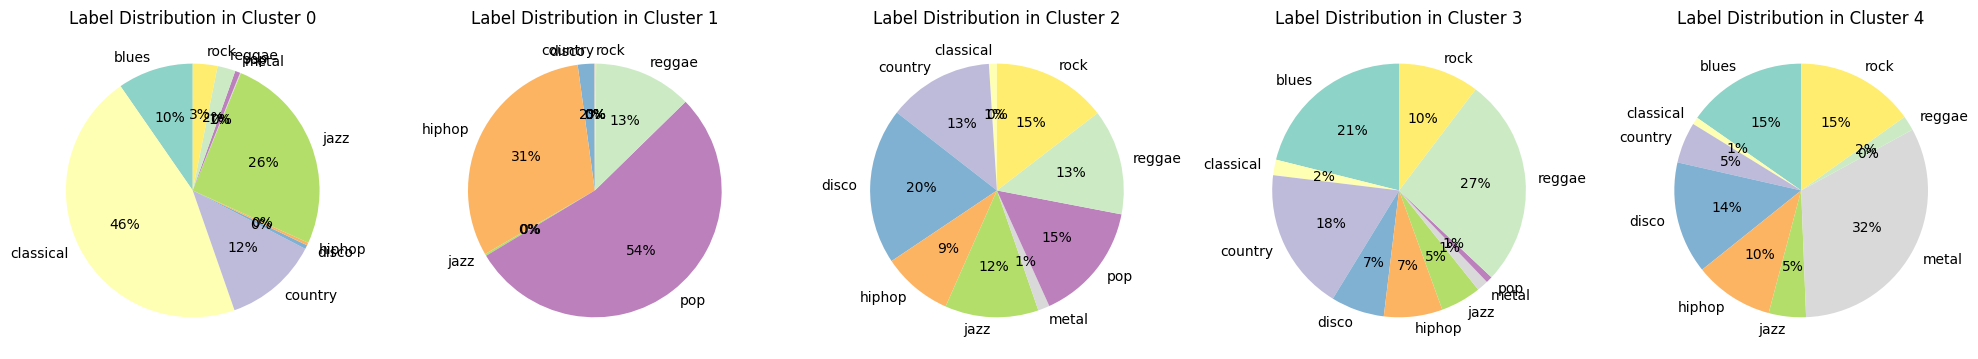

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=len(comparison_table_percentage_5.columns), figsize=(20, 10))

for i, cluster in enumerate(comparison_table_percentage_5.columns):
    comparison_table_percentage_5[cluster].plot.pie(ax=axes[i], autopct="%1.0f%%", startangle=90, cmap="Set3")
    axes[i].set_title(f"Label Distribution in Cluster {cluster}")
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

In [32]:
# Overview of 6 clusters from the PCA+KMeans (with k = 6) vs. the 10 given labels 

comparison_table_6 = pd.crosstab(df["label"], df["Cluster_PCA_K(6)"])
comparison_table_percentage_6 = comparison_table_6.div(comparison_table_6.sum(axis=0), axis=1) * 100
styled_table_6 = comparison_table_percentage_6.style.background_gradient(cmap='Blues')
styled_table_6

Cluster_PCA_K(6),0,1,2,3,4,5
label,,,,,,
blues,14.946750,0.000000,22.097588,0.000000,0.069881,10.796074
classical,0.844657,0.306044,2.131239,0.000000,2.585604,48.854962
country,4.700698,8.416220,17.106001,0.219298,18.169113,10.468920
disco,14.763129,23.794950,7.178912,1.754386,9.224319,0.545256
hiphop,10.503122,9.257842,6.057207,36.403509,10.062893,0.381679
jazz,3.084833,9.563887,9.422322,0.219298,11.879804,24.591058
metal,34.190231,1.989288,1.906898,0.000000,0.489168,0.109051
pop,0.000000,30.604438,0.000000,46.381579,12.019567,0.272628
reggae,1.652589,3.978577,22.770611,14.912281,22.921034,1.799346


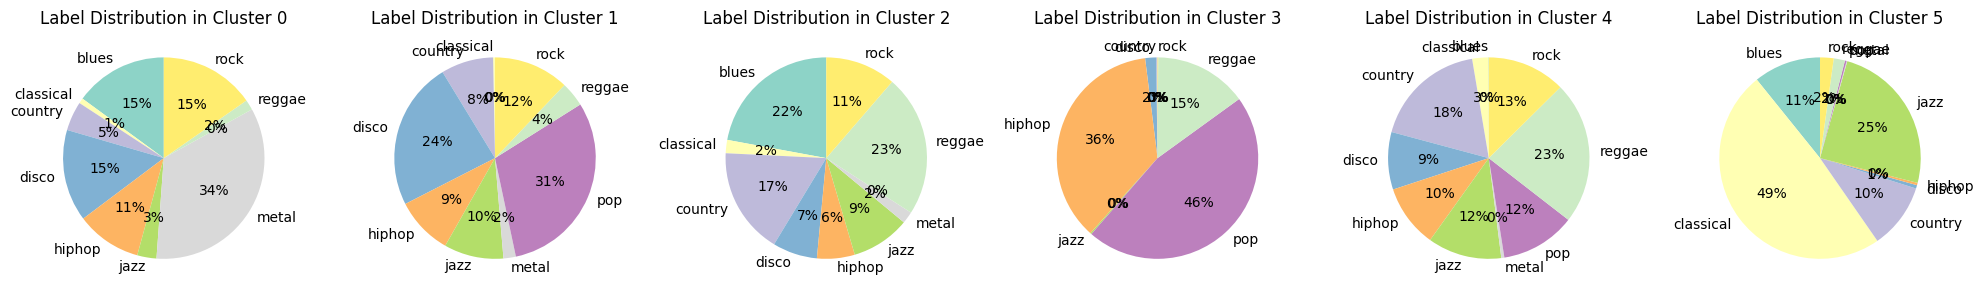

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=len(comparison_table_percentage_6.columns), figsize=(20, 10))

for i, cluster in enumerate(comparison_table_percentage_6.columns):
    comparison_table_percentage_6[cluster].plot.pie(ax=axes[i], autopct="%1.0f%%", startangle=90, cmap="Set3")
    axes[i].set_title(f"Label Distribution in Cluster {cluster}")
    axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()